# Laptop Price Prediction

### This project aims to predict laptop prices based on various features and specifications using machine learning algorithms

<img src=https://waltondigitech.com:8000/media/menu_icon/menu_image/Passion.png width='400'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [3]:
df=pd.read_csv('laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['Touchscreen'] = df['Touchscreen'].astype(int)
df = df.drop('ScreenResolution', axis=1)

In [7]:
import re
df['Cpu_Numbers'] = df['Cpu'].str.extract(r'(\d+(\.\d+)?)GHz', expand=False)[0]
df['Cpu_Other'] = df['Cpu'].apply(lambda x: re.sub(r'\d+(\.\d+)?GHz', '', x))
df['Cpu_Numbers'] = df['Cpu_Numbers'].astype(float)
df = df.drop('Cpu', axis=1)

In [8]:
df['Memory_Numbers'] = df['Memory'].str.extract('(\d+)')
df['Memory_Numbers'] = df['Memory_Numbers'].astype(int)
df['Memory_Words'] = df['Memory'].str.extract('(\D+)')
df = df.drop('Memory', axis=1)
df['Memory_Words'] = df['Memory_Words'].str.replace(r'\b(GB|TB)\b', '', regex=True)

In [9]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Cpu_Numbers,Cpu_Other,Memory_Numbers,Memory_Words
1298,1298,Lenovo,2 in 1 Convertible,14.0,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.64,1,2.5,Intel Core i7 6500U,128,SSD
1299,1299,Lenovo,2 in 1 Convertible,13.3,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.72,1,2.5,Intel Core i7 6500U,512,SSD
1300,1300,Lenovo,Notebook,14.0,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.12,0,1.6,Intel Celeron Dual Core N3050,64,Flash Storage
1301,1301,HP,Notebook,15.6,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92,0,2.5,Intel Core i7 6500U,1,HDD
1302,1302,Asus,Notebook,15.6,4GB,Intel HD Graphics,Windows 10,2.2kg,19660.32,0,1.6,Intel Celeron Dual Core N3050,500,HDD


In [10]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [11]:
df['TypeName'] = df['TypeName'].str.replace('2 in 1 Convertible', 'Convertible')

In [12]:
df['TypeName'].value_counts()

TypeName
Notebook       727
Gaming         205
Ultrabook      196
Convertible    121
Workstation     29
Netbook         25
Name: count, dtype: int64

In [13]:
df=df.drop(['Unnamed: 0'],axis=1)

In [14]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price             1.000000
Cpu_Numbers       0.430293
Memory_Numbers    0.298177
Touchscreen       0.191226
Inches            0.068197
Name: Price, dtype: float64

In [15]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [16]:
df['Ram'] = df['Ram'].replace('[^\d.]', '', regex=True).astype(int)
df['Weight'] = df['Weight'].replace('[^\d.]', '', regex=True).astype(float)

In [17]:
df['Ram'].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [18]:
df['Weight'].value_counts()

Weight
2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: count, Length: 171, dtype: int64

In [19]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price             1.000000
Ram               0.743007
Cpu_Numbers       0.430293
Memory_Numbers    0.298177
Weight            0.210370
Touchscreen       0.191226
Inches            0.068197
Name: Price, dtype: float64

In [20]:
df.isnull().sum()

Company           0
TypeName          0
Inches            0
Ram               0
Gpu               0
OpSys             0
Weight            0
Price             0
Touchscreen       0
Cpu_Numbers       0
Cpu_Other         0
Memory_Numbers    0
Memory_Words      0
dtype: int64

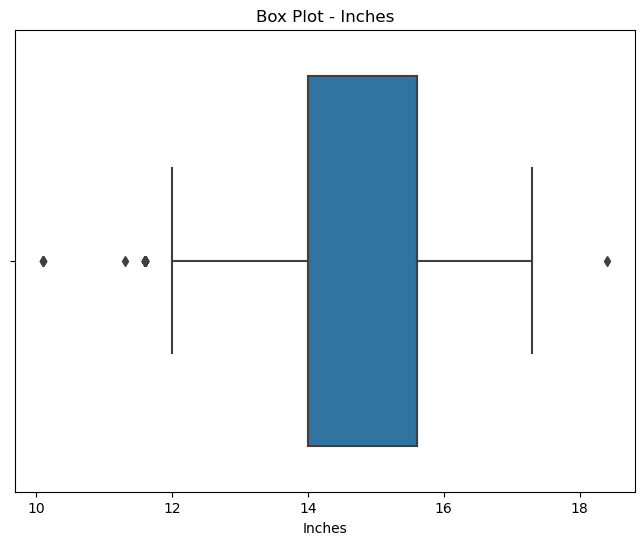

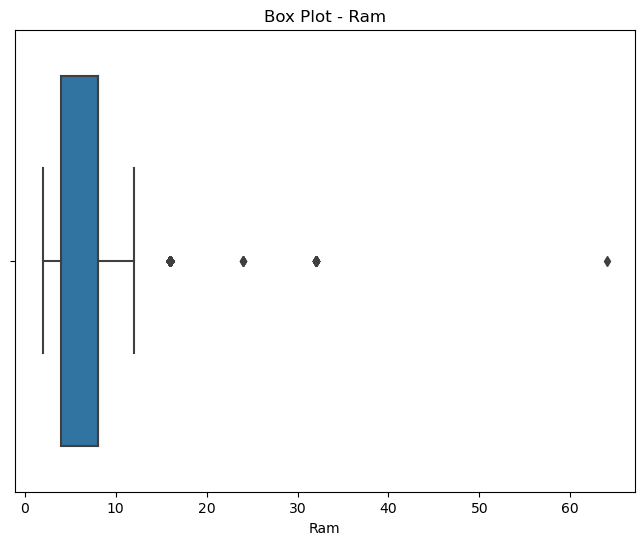

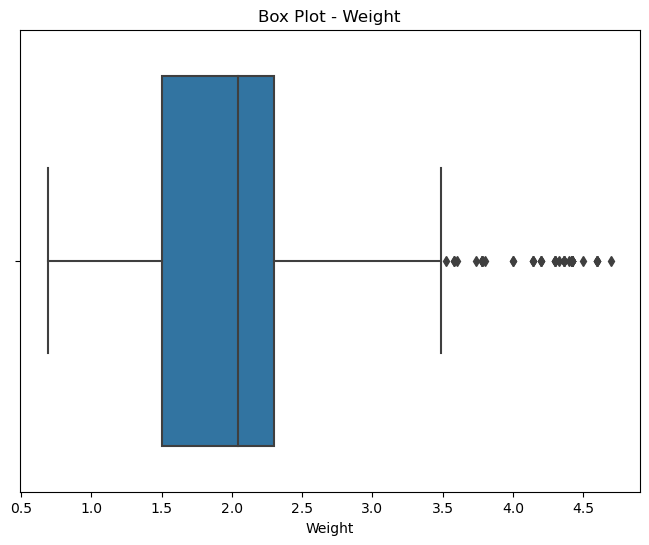

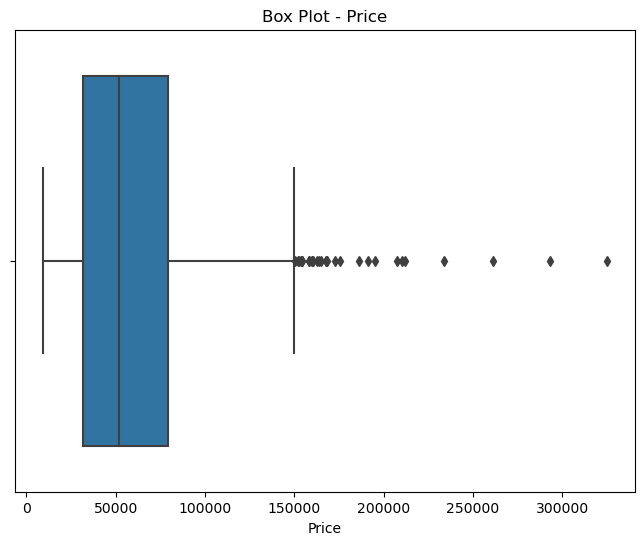

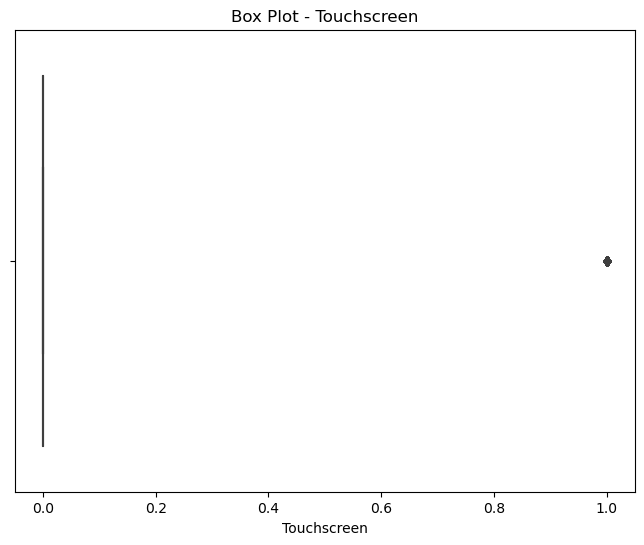

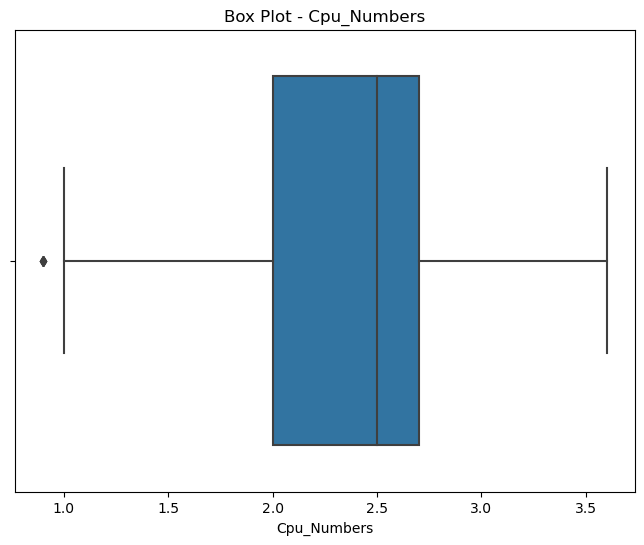

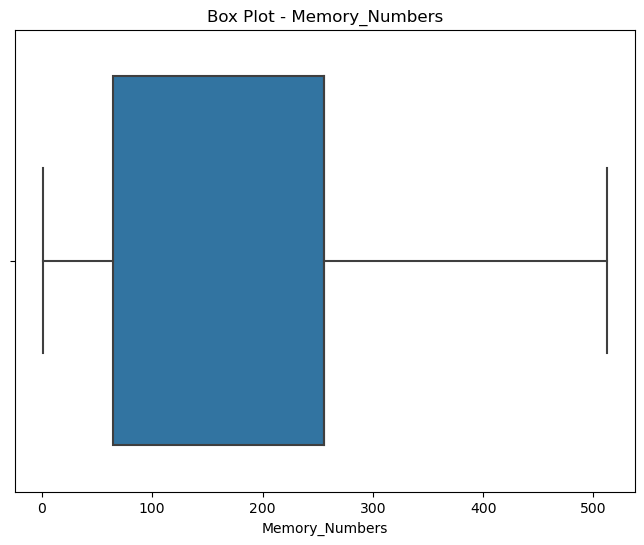

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_outliers(df):
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]: 
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Box Plot - {column}')
            plt.show()

visualize_outliers(df)

In [23]:
outliers = df.select_dtypes(include=[np.number]).quantile(0.97)

In [24]:
df=df[(df['Ram']<outliers['Ram'])]
df=df[(df['Price']<outliers['Price'])]
df=df[(df['Touchscreen']<outliers['Touchscreen'])]

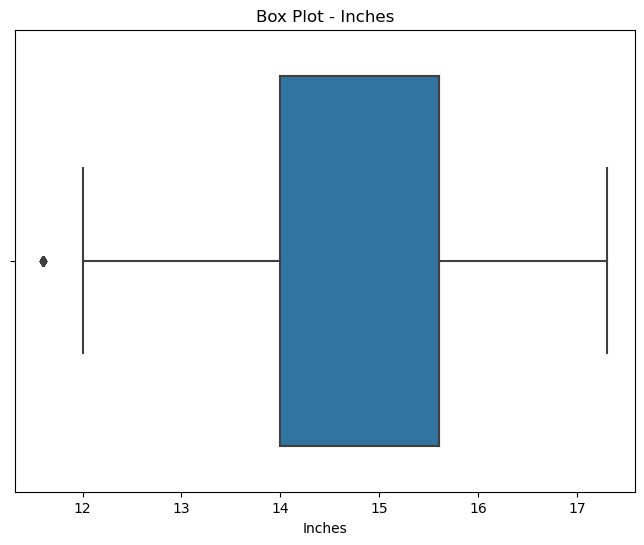

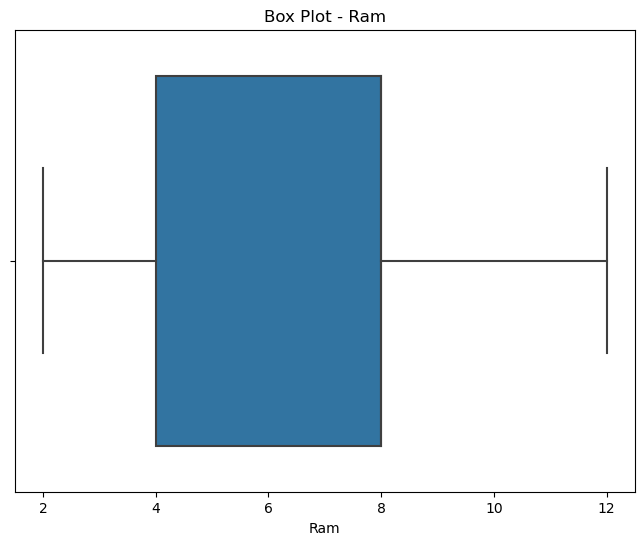

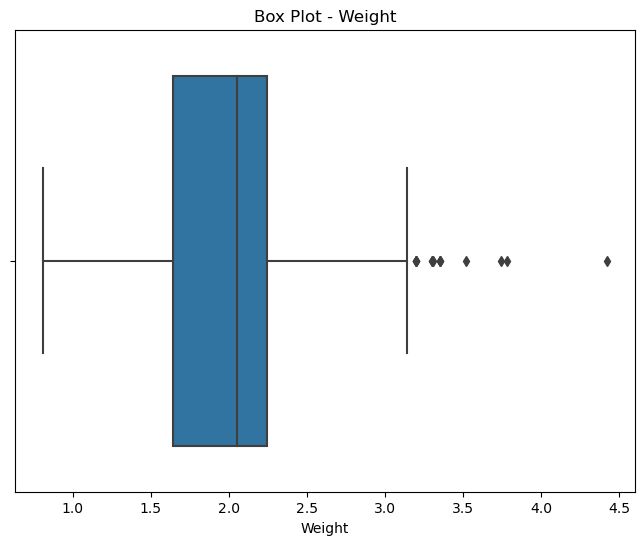

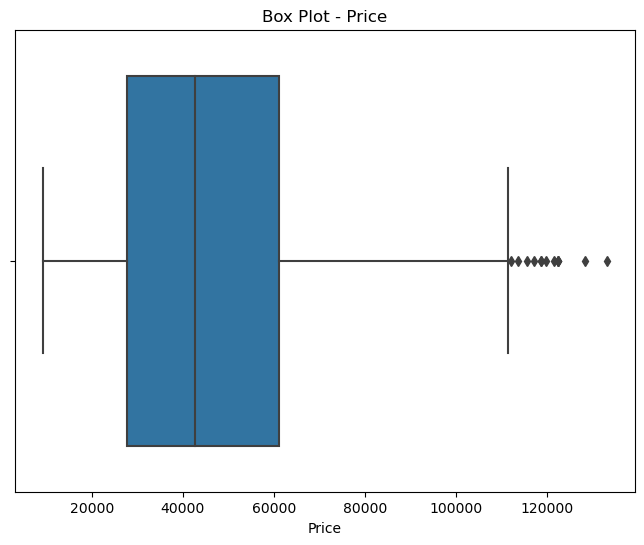

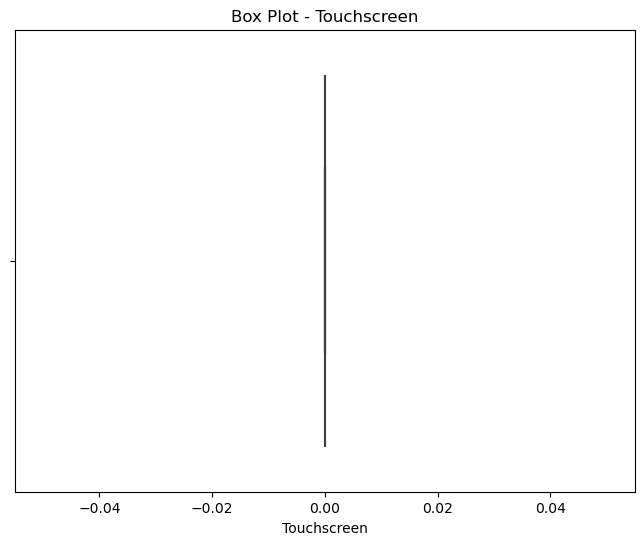

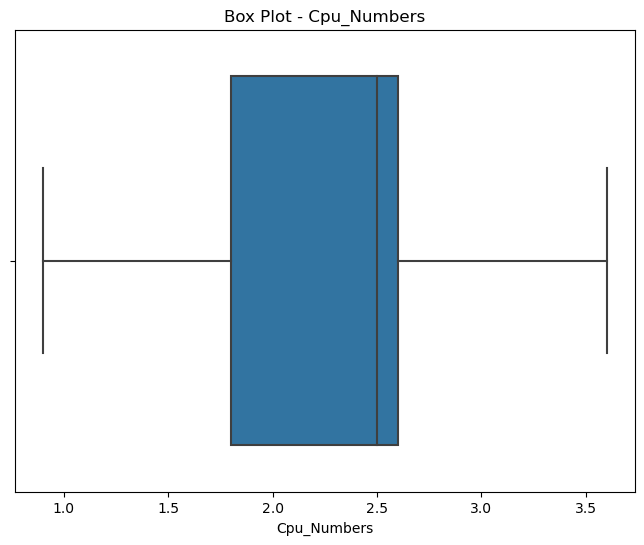

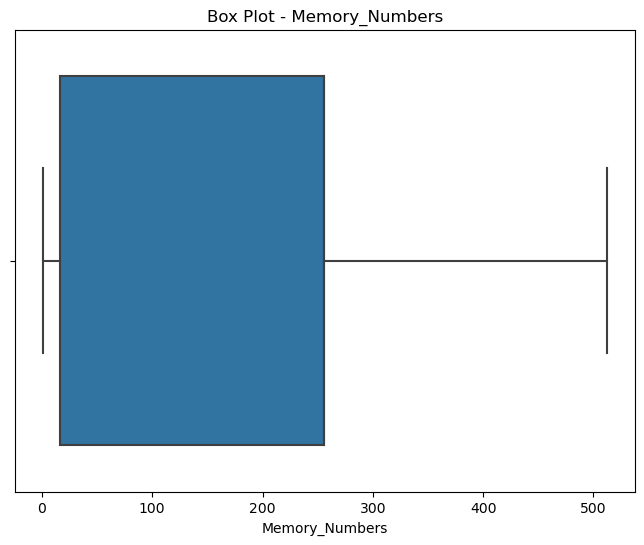

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_outliers(df):
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]: 
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Box Plot - {column}')
            plt.show()

visualize_outliers(df)

In [26]:
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Cpu_Numbers,Cpu_Other,Memory_Numbers,Memory_Words
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,Intel Core i5,128,SSD
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,Intel Core i5,128,Flash Storage
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,Intel Core i5 7200U,256,SSD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1,Intel Core i5,256,SSD
5,Acer,Notebook,15.6,4,AMD Radeon R5,Windows 10,2.10,21312.0000,0,3.0,AMD A9-Series 9420,500,HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,HP,Netbook,11.6,2,Intel HD Graphics 400,Windows 10,1.17,11135.5200,0,1.6,Intel Celeron Dual Core N3060,32,Flash Storage
1297,Asus,Notebook,15.6,4,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,2.5,Intel Core i7 6500U,500,HDD
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,1.6,Intel Celeron Dual Core N3050,64,Flash Storage
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,2.5,Intel Core i7 6500U,1,HDD


In [27]:
df=df.drop(['Cpu_Other',
       'Gpu'],axis=1)

In [28]:
df=pd.get_dummies(df,drop_first=True)

In [29]:
x=df.drop('Price',axis=1)
y=df[['Price']]

In [30]:
x

,Inches,Ram,Weight,Touchscreen,Cpu_Numbers,Memory_Numbers,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Memory_Words_ Flash Storage +,Memory_Words_ HDD,Memory_Words_ HDD +,Memory_Words_ Hybrid,Memory_Words_ SSD,Memory_Words_ SSD +,Memory_Words_.
0,13.3,8,1.37,0,2.3,128,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
1,13.3,8,1.34,0,1.8,128,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,15.6,8,1.86,0,2.5,256,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,13.3,8,1.37,0,3.1,256,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
5,15.6,4,2.10,0,3.0,500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,11.6,2,1.17,0,1.6,32,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1297,15.6,4,2.20,0,2.5,500,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1300,14.0,2,1.50,0,1.6,64,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1301,15.6,6,2.19,0,2.5,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False


In [31]:
y

,Price
0,71378.6832
1,47895.5232
2,30636.0000
4,96095.8080
5,21312.0000
...,...
1296,11135.5200
1297,38378.6496
1300,12201.1200
1301,40705.9200


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
       
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
      
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            


        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
      
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.834323,10478.873654,7129.149963
Gradient Boosting,0.819949,10924.005706,8204.056571
Ridge,0.751250,12840.016948,9747.920793
KNeighborsRegressor,0.745213,12994.870507,9269.402170
Lasso,0.741336,13093.386569,9867.922942
Linear,0.739195,13147.463617,9900.382582
Extra Tree,0.671414,14757.341892,10106.394600
Decision Tree,0.658737,15039.313604,9741.600421
ElasticNet,0.632421,15608.415133,11457.839829


### Here we got the highest R_Squared with 83.43 in our XGBRegressor algorithm